In [ ]:
import pickle
import math

import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from helper import batches

# reload the data
pickle_file = 'notMNIST.pickle'
with open(pickle_file, 'rb') as pfile:
    pickle_data = pickle.load(pfile)
    train_features = pickle_data['train_dataset']
    train_labels = pickle_data['train_labels']
    valid_features = pickle_data['valid_dataset']
    valid_labels = pickle_data['valid_labels']
    test_features = pickle_data['test_dataset']
    test_labels = pickle_data['test_labels']
    del pickle_data

print('Data module loaded')

In [ ]:
n_classes = (train_labels[0].shape)[0]
print(n_classes)

In [34]:
learning_rate = 0.1
batch_size = 128
training_epochs = 5
display_step = 50

n_records, n_features = train_features.shape
n_classes = (train_labels[0].shape)[0]
n_hidden_layer = 256

# weights and bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_features, n_hidden_layer])),
    'output_layer': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}

biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'output_layer': tf.Variable(tf.random_normal([n_classes]))
}

# define inputs
x = tf.placeholder("float", [None, n_features])
y = tf.placeholder("float", [None, n_classes])

layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']), biases['hidden_layer']) # (n_records, n_hidden_layer)
layer_1 = tf.nn.relu(layer_1)

layer_2 = tf.add(tf.matmul(layer_1, weights['output_layer']), biases['output_layer'])

In [35]:
# Optimizer

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=layer_2, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

prediction = tf.nn.softmax(layer_2)
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print("Accuracy function created.")


Accuracy function created.


In [36]:
mbatches = batches(batch_size, train_features, train_labels)
print(len(mbatches))
batch_x, batch_y = batch
print(batch_x[0])
print(batch_y[0])

1114
[ 0.1         0.1         0.1         0.1         0.1         0.1         0.1
  0.1         0.1         0.1         0.11254902  0.1         0.41999999
  0.90000004  0.89372557  0.90000004  0.90000004  0.90000004  0.90000004
  0.90000004  0.90000004  0.90000004  0.90000004  0.90000004  0.90000004
  0.89372557  0.90000004  0.70862746  0.1         0.1         0.1         0.1
  0.1         0.1         0.1         0.1         0.1         0.10313725
  0.1         0.11254902  0.72745103  0.90000004  0.89372557  0.90000004
  0.90000004  0.90000004  0.90000004  0.90000004  0.90000004  0.90000004
  0.90000004  0.90000004  0.90000004  0.89686275  0.90000004  0.37294117
  0.1         0.1         0.1         0.1         0.1         0.1         0.1
  0.1         0.1         0.10941177  0.1         0.3509804   0.90000004
  0.89686275  0.90000004  0.90000004  0.90000004  0.90000004  0.90000004
  0.90000004  0.90000004  0.90000004  0.90000004  0.90000004  0.89372557
  0.90000004  0.72431374  0.1  

Epoch  1/5:   0%|          | 0/1114 [00:00<?, ?batches/s]

Progress: 0.0% ... Training loss: 433.9 ... Validation accuracy: 0.149

Epoch  1/5:   4%|▎         | 41/1114 [00:02<19:11,  1.07s/batches]

Progress: 4.5% ... Training loss: 9.883 ... Validation accuracy: 0.64

Epoch  1/5:   8%|▊         | 90/1114 [00:04<06:43,  2.54batches/s]

Progress: 9.0% ... Training loss: 7.970 ... Validation accuracy: 0.634

Epoch  1/5:  13%|█▎        | 141/1114 [00:06<02:32,  6.37batches/s]

Progress: 13.5% ... Training loss: 5.891 ... Validation accuracy: 0.631

Epoch  1/5:  18%|█▊        | 195/1114 [00:08<01:07, 13.57batches/s]

Progress: 18.0% ... Training loss: 4.821 ... Validation accuracy: 0.624

Epoch  1/5:  21%|██        | 231/1114 [00:09<00:53, 16.57batches/s]

Progress: 22.4% ... Training loss: 4.917 ... Validation accuracy: 0.616

Epoch  1/5:  27%|██▋       | 299/1114 [00:12<00:22, 35.74batches/s]

Progress: 26.9% ... Training loss: 4.632 ... Validation accuracy: 0.612

Epoch  1/5:  30%|██▉       | 331/1114 [00:13<00:33, 23.22batches/s]

Progress: 31.4% ... Training loss: 2.869 ... Validation accuracy: 0.607

Epoch  1/5:  35%|███▍      | 388/1114 [00:15<00:22, 32.61batches/s]

Progress: 35.9% ... Training loss: 2.555 ... Validation accuracy: 0.601

Epoch  1/5:  39%|███▉      | 433/1114 [00:17<00:21, 31.79batches/s]

Progress: 40.4% ... Training loss: 3.838 ... Validation accuracy: 0.614

Epoch  1/5:  44%|████▍     | 490/1114 [00:19<00:17, 36.32batches/s]

Progress: 44.9% ... Training loss: 3.243 ... Validation accuracy: 0.634

Epoch  1/5:  49%|████▊     | 541/1114 [00:21<00:17, 32.95batches/s]

Progress: 49.4% ... Training loss: 2.911 ... Validation accuracy: 0.631

Epoch  1/5:  54%|█████▍    | 599/1114 [00:23<00:15, 33.10batches/s]

Progress: 53.9% ... Training loss: 2.422 ... Validation accuracy: 0.635

Epoch  1/5:  57%|█████▋    | 634/1114 [00:25<00:19, 24.09batches/s]

Progress: 58.3% ... Training loss: 1.937 ... Validation accuracy: 0.644

Epoch  1/5:  62%|██████▏   | 691/1114 [00:27<00:13, 31.96batches/s]

Progress: 62.8% ... Training loss: 1.875 ... Validation accuracy: 0.642

Epoch  1/5:  67%|██████▋   | 745/1114 [00:29<00:10, 33.71batches/s]

Progress: 67.3% ... Training loss: 1.499 ... Validation accuracy: 0.643

Epoch  1/5:  72%|███████▏  | 797/1114 [00:31<00:09, 33.81batches/s]

Progress: 71.8% ... Training loss: 1.564 ... Validation accuracy: 0.648

Epoch  1/5:  76%|███████▋  | 850/1114 [00:33<00:07, 33.79batches/s]

Progress: 76.3% ... Training loss: 2.033 ... Validation accuracy: 0.647

Epoch  1/5:  79%|███████▉  | 883/1114 [00:35<00:09, 24.87batches/s]

Progress: 80.8% ... Training loss: 1.979 ... Validation accuracy: 0.660

Epoch  1/5:  84%|████████▍ | 939/1114 [00:37<00:05, 31.78batches/s]

Progress: 85.3% ... Training loss: 2.040 ... Validation accuracy: 0.657

Epoch  1/5:  89%|████████▊ | 986/1114 [00:39<00:04, 30.39batches/s]

Progress: 89.8% ... Training loss: 1.248 ... Validation accuracy: 0.663

Epoch  1/5:  94%|█████████▎| 1042/1114 [00:41<00:02, 32.69batches/s]

Progress: 94.3% ... Training loss: 1.059 ... Validation accuracy: 0.676

Epoch  1/5:  98%|█████████▊| 1094/1114 [00:43<00:00, 33.09batches/s]

Progress: 98.7% ... Training loss: 1.503 ... Validation accuracy: 0.676

Epoch  2/5:   0%|          | 0/1114 [00:00<?, ?batches/s]

Progress: 0.0% ... Training loss: 1.182 ... Validation accuracy: 0.674

Epoch  2/5:   4%|▎         | 39/1114 [00:02<16:19,  1.10batches/s]

Progress: 4.5% ... Training loss: 1.240 ... Validation accuracy: 0.683

Epoch  2/5:   8%|▊         | 94/1114 [00:04<05:43,  2.97batches/s]

Progress: 9.0% ... Training loss: 1.479 ... Validation accuracy: 0.683

Epoch  2/5:  12%|█▏        | 130/1114 [00:05<03:05,  5.30batches/s]

Progress: 13.5% ... Training loss: 1.366 ... Validation accuracy: 0.688

Epoch  2/5:  17%|█▋        | 194/1114 [00:07<01:12, 12.73batches/s]

Progress: 18.0% ... Training loss: 1.436 ... Validation accuracy: 0.695

Epoch  2/5:  21%|██        | 231/1114 [00:09<00:54, 16.11batches/s]

Progress: 22.4% ... Training loss: 1.319 ... Validation accuracy: 0.688

Epoch  2/5:  26%|██▌       | 292/1114 [00:11<00:30, 27.18batches/s]

Progress: 26.9% ... Training loss: 1.377 ... Validation accuracy: 0.692

Epoch  2/5:  31%|███▏      | 349/1114 [00:13<00:23, 32.36batches/s]

Progress: 31.4% ... Training loss: 1.185 ... Validation accuracy: 0.693

Epoch  2/5:  35%|███▍      | 386/1114 [00:14<00:27, 26.29batches/s]

Progress: 35.9% ... Training loss: 1.105 ... Validation accuracy: 0.696

Epoch  2/5:  40%|████      | 450/1114 [00:17<00:17, 38.65batches/s]

Progress: 40.4% ... Training loss: 1.466 ... Validation accuracy: 0.698

Epoch  2/5:  43%|████▎     | 484/1114 [00:19<00:24, 25.25batches/s]

Progress: 44.9% ... Training loss: 1.652 ... Validation accuracy: 0.706

Epoch  2/5:  48%|████▊     | 539/1114 [00:20<00:18, 31.90batches/s]

Progress: 49.4% ... Training loss: 1.470 ... Validation accuracy: 0.713

Epoch  2/5:  53%|█████▎    | 590/1114 [00:22<00:16, 31.39batches/s]

Progress: 53.9% ... Training loss: 1.366 ... Validation accuracy: 0.710

Epoch  2/5:  58%|█████▊    | 644/1114 [00:24<00:14, 32.76batches/s]

Progress: 58.3% ... Training loss: 1.011 ... Validation accuracy: 0.710

Epoch  2/5:  62%|██████▏   | 696/1114 [00:26<00:12, 33.10batches/s]

Progress: 62.8% ... Training loss: 1.190 ... Validation accuracy: 0.709

Epoch  2/5:  66%|██████▌   | 732/1114 [00:28<00:15, 24.68batches/s]

Progress: 67.3% ... Training loss: 0.922 ... Validation accuracy: 0.715

Epoch  2/5:  71%|███████   | 789/1114 [00:30<00:09, 33.16batches/s]

Progress: 71.8% ... Training loss: 0.945 ... Validation accuracy: 0.711

Epoch  2/5:  76%|███████▌  | 844/1114 [00:32<00:08, 32.74batches/s]

Progress: 76.3% ... Training loss: 1.37 ... Validation accuracy: 0.714

Epoch  2/5:  81%|████████  | 900/1114 [00:34<00:06, 35.05batches/s]

Progress: 80.8% ... Training loss: 1.217 ... Validation accuracy: 0.729

Epoch  2/5:  84%|████████▍ | 937/1114 [00:36<00:06, 26.84batches/s]

Progress: 85.3% ... Training loss: 1.547 ... Validation accuracy: 0.718

Epoch  2/5:  89%|████████▉ | 989/1114 [00:38<00:04, 30.39batches/s]

Progress: 89.8% ... Training loss: 0.880 ... Validation accuracy: 0.724

Epoch  2/5:  94%|█████████▍| 1049/1114 [00:40<00:01, 39.55batches/s]

Progress: 94.3% ... Training loss: 0.773 ... Validation accuracy: 0.721

Epoch  2/5:  97%|█████████▋| 1081/1114 [00:42<00:01, 23.17batches/s]

Progress: 98.7% ... Training loss: 1.054 ... Validation accuracy: 0.728

Epoch  3/5:   0%|          | 0/1114 [00:00<?, ?batches/s]

Progress: 0.0% ... Training loss: 0.979 ... Validation accuracy: 0.725

Epoch  3/5:   4%|▎         | 41/1114 [00:02<16:29,  1.08batches/s]

Progress: 4.5% ... Training loss: 0.916 ... Validation accuracy: 0.730

Epoch  3/5:   8%|▊         | 91/1114 [00:03<05:49,  2.93batches/s]

Progress: 9.0% ... Training loss: 1.028 ... Validation accuracy: 0.733

Epoch  3/5:  13%|█▎        | 144/1114 [00:05<02:13,  7.27batches/s]

Progress: 13.5% ... Training loss: 1.060 ... Validation accuracy: 0.732

Epoch  3/5:  18%|█▊        | 199/1114 [00:07<01:01, 14.88batches/s]

Progress: 18.0% ... Training loss: 1.052 ... Validation accuracy: 0.732

Epoch  3/5:  21%|██        | 234/1114 [00:09<00:51, 17.20batches/s]

Progress: 22.4% ... Training loss: 1.045 ... Validation accuracy: 0.732

Epoch  3/5:  26%|██▌       | 290/1114 [00:11<00:31, 26.25batches/s]

Progress: 26.9% ... Training loss: 1.042 ... Validation accuracy: 0.729

Epoch  3/5:  31%|███       | 345/1114 [00:13<00:24, 30.90batches/s]

Progress: 31.4% ... Training loss: 0.922 ... Validation accuracy: 0.741

Epoch  3/5:  36%|███▌      | 400/1114 [00:15<00:21, 32.98batches/s]

Progress: 35.9% ... Training loss: 0.884 ... Validation accuracy: 0.740

Epoch  3/5:  39%|███▉      | 436/1114 [00:17<00:25, 26.46batches/s]

Progress: 40.4% ... Training loss: 1.181 ... Validation accuracy: 0.735

Epoch  3/5:  44%|████▍     | 492/1114 [00:19<00:20, 30.25batches/s]

Progress: 44.9% ... Training loss: 1.449 ... Validation accuracy: 0.743

Epoch  3/5:  49%|████▉     | 549/1114 [00:21<00:16, 34.07batches/s]

Progress: 49.4% ... Training loss: 1.095 ... Validation accuracy: 0.743

Epoch  3/5:  53%|█████▎    | 587/1114 [00:22<00:19, 27.20batches/s]

Progress: 53.9% ... Training loss: 1.140 ... Validation accuracy: 0.742

Epoch  3/5:  58%|█████▊    | 643/1114 [00:24<00:15, 30.84batches/s]

Progress: 58.3% ... Training loss: 0.873 ... Validation accuracy: 0.744

Epoch  3/5:  61%|██████    | 680/1114 [00:26<00:17, 25.24batches/s]

Progress: 62.8% ... Training loss: 1.018 ... Validation accuracy: 0.737

Epoch  3/5:  67%|██████▋   | 744/1114 [00:28<00:10, 36.12batches/s]

Progress: 67.3% ... Training loss: 0.780 ... Validation accuracy: 0.746

Epoch  3/5:  72%|███████▏  | 798/1114 [00:30<00:08, 35.77batches/s]

Progress: 71.8% ... Training loss: 0.819 ... Validation accuracy: 0.746

Epoch  3/5:  76%|███████▋  | 850/1114 [00:32<00:07, 34.50batches/s]

Progress: 76.3% ... Training loss: 1.260 ... Validation accuracy: 0.741

Epoch  3/5:  81%|████████  | 900/1114 [00:34<00:07, 29.21batches/s]

Progress: 80.8% ... Training loss: 1.013 ... Validation accuracy: 0.752

Epoch  3/5:  84%|████████▍ | 934/1114 [00:36<00:08, 21.96batches/s]

Progress: 85.3% ... Training loss: 1.341 ... Validation accuracy: 0.749

Epoch  3/5:  88%|████████▊ | 982/1114 [00:38<00:03, 34.82batches/s]

Progress: 89.8% ... Training loss: 0.759 ... Validation accuracy: 0.751

Epoch  3/5:  94%|█████████▎| 1044/1114 [00:40<00:01, 38.01batches/s]

Progress: 94.3% ... Training loss: 0.714 ... Validation accuracy: 0.745

Epoch  3/5:  97%|█████████▋| 1080/1114 [00:42<00:01, 25.43batches/s]

Progress: 98.7% ... Training loss: 0.901 ... Validation accuracy: 0.752

Epoch  4/5:   0%|          | 0/1114 [00:00<?, ?batches/s]

Progress: 0.0% ... Training loss: 0.950 ... Validation accuracy: 0.748

Epoch  4/5:   4%|▎         | 41/1114 [00:01<14:28,  1.23batches/s]

Progress: 4.5% ... Training loss: 0.808 ... Validation accuracy: 0.752

Epoch  4/5:   8%|▊         | 90/1114 [00:03<05:13,  3.26batches/s]

Progress: 9.0% ... Training loss: 0.891 ... Validation accuracy: 0.757

Epoch  4/5:  13%|█▎        | 147/1114 [00:05<02:01,  7.94batches/s]

Progress: 13.5% ... Training loss: 0.945 ... Validation accuracy: 0.752

Epoch  4/5:  16%|█▋        | 183/1114 [00:07<01:19, 11.66batches/s]

Progress: 18.0% ... Training loss: 0.963 ... Validation accuracy: 0.749

Epoch  4/5:  22%|██▏       | 245/1114 [00:09<00:40, 21.55batches/s]

Progress: 22.4% ... Training loss: 0.931 ... Validation accuracy: 0.755

Epoch  4/5:  25%|██▌       | 283/1114 [00:11<00:37, 22.14batches/s]

Progress: 26.9% ... Training loss: 0.924 ... Validation accuracy: 0.743

Epoch  4/5:  31%|███       | 345/1114 [00:13<00:23, 32.10batches/s]

Progress: 31.4% ... Training loss: 0.805 ... Validation accuracy: 0.757

Epoch  4/5:  34%|███▍      | 382/1114 [00:14<00:27, 26.44batches/s]

Progress: 35.9% ... Training loss: 0.810 ... Validation accuracy: 0.751

Epoch  4/5:  40%|███▉      | 444/1114 [00:16<00:18, 35.85batches/s]

Progress: 40.4% ... Training loss: 1.099 ... Validation accuracy: 0.746

Epoch  4/5:  43%|████▎     | 481/1114 [00:18<00:23, 27.40batches/s]

Progress: 44.9% ... Training loss: 1.294 ... Validation accuracy: 0.758

Epoch  4/5:  49%|████▉     | 545/1114 [00:20<00:15, 37.09batches/s]

Progress: 49.4% ... Training loss: 1.009 ... Validation accuracy: 0.757

Epoch  4/5:  52%|█████▏    | 583/1114 [00:21<00:19, 27.93batches/s]

Progress: 53.9% ... Training loss: 1.040 ... Validation accuracy: 0.756

Epoch  4/5:  58%|█████▊    | 642/1114 [00:23<00:13, 35.55batches/s]

Progress: 58.3% ... Training loss: 0.789 ... Validation accuracy: 0.758

Epoch  4/5:  61%|██████    | 680/1114 [00:25<00:15, 27.66batches/s]

Progress: 62.8% ... Training loss: 0.942 ... Validation accuracy: 0.749

Epoch  4/5:  67%|██████▋   | 745/1114 [00:27<00:09, 38.24batches/s]

Progress: 67.3% ... Training loss: 0.718 ... Validation accuracy: 0.757

Epoch  4/5:  70%|███████   | 783/1114 [00:29<00:11, 28.28batches/s]

Progress: 71.8% ... Training loss: 0.770 ... Validation accuracy: 0.757

Epoch  4/5:  76%|███████▌  | 843/1114 [00:30<00:07, 36.11batches/s]

Progress: 76.3% ... Training loss: 1.174 ... Validation accuracy: 0.758

Epoch  4/5:  79%|███████▉  | 881/1114 [00:32<00:08, 27.77batches/s]

Progress: 80.8% ... Training loss: 0.927 ... Validation accuracy: 0.761

Epoch  4/5:  85%|████████▍ | 944/1114 [00:34<00:04, 37.31batches/s]

Progress: 85.3% ... Training loss: 1.164 ... Validation accuracy: 0.762

Epoch  4/5:  88%|████████▊ | 981/1114 [00:36<00:04, 28.00batches/s]

Progress: 89.8% ... Training loss: 0.714 ... Validation accuracy: 0.76

Epoch  4/5:  94%|█████████▎| 1044/1114 [00:37<00:01, 37.57batches/s]

Progress: 94.3% ... Training loss: 0.646 ... Validation accuracy: 0.758

Epoch  4/5:  97%|█████████▋| 1082/1114 [00:39<00:01, 28.15batches/s]

Progress: 98.7% ... Training loss: 0.852 ... Validation accuracy: 0.764

Epoch  5/5:   0%|          | 0/1114 [00:00<?, ?batches/s]

Progress: 0.0% ... Training loss: 0.908 ... Validation accuracy: 0.763

Epoch  5/5:   4%|▍         | 44/1114 [00:01<13:30,  1.32batches/s]

Progress: 4.5% ... Training loss: 0.769 ... Validation accuracy: 0.761

Epoch  5/5:   8%|▊         | 93/1114 [00:03<04:50,  3.52batches/s]

Progress: 9.0% ... Training loss: 0.815 ... Validation accuracy: 0.766

Epoch  5/5:  13%|█▎        | 150/1114 [00:05<01:53,  8.50batches/s]

Progress: 13.5% ... Training loss: 0.881 ... Validation accuracy: 0.764

Epoch  5/5:  17%|█▋        | 188/1114 [00:07<01:14, 12.43batches/s]

Progress: 18.0% ... Training loss: 0.920 ... Validation accuracy: 0.763

Epoch  5/5:  22%|██▏       | 246/1114 [00:09<00:39, 21.85batches/s]

Progress: 22.4% ... Training loss: 0.847 ... Validation accuracy: 0.766

Epoch  5/5:  25%|██▌       | 283/1114 [00:10<00:37, 22.19batches/s]

Progress: 26.9% ... Training loss: 0.856 ... Validation accuracy: 0.759

Epoch  5/5:  31%|███       | 343/1114 [00:12<00:24, 31.82batches/s]

Progress: 31.4% ... Training loss: 0.757 ... Validation accuracy: 0.766

Epoch  5/5:  34%|███▍      | 381/1114 [00:14<00:27, 26.38batches/s]

Progress: 35.9% ... Training loss: 0.763 ... Validation accuracy: 0.763

Epoch  5/5:  40%|███▉      | 444/1114 [00:16<00:18, 36.39batches/s]

Progress: 40.4% ... Training loss: 1.032 ... Validation accuracy: 0.758

Epoch  5/5:  43%|████▎     | 482/1114 [00:17<00:22, 27.61batches/s]

Progress: 44.9% ... Training loss: 1.097 ... Validation accuracy: 0.770

Epoch  5/5:  49%|████▉     | 544/1114 [00:19<00:15, 36.44batches/s]

Progress: 49.4% ... Training loss: 0.966 ... Validation accuracy: 0.767

Epoch  5/5:  52%|█████▏    | 581/1114 [00:21<00:19, 27.78batches/s]

Progress: 53.9% ... Training loss: 0.986 ... Validation accuracy: 0.767

Epoch  5/5:  58%|█████▊    | 643/1114 [00:23<00:12, 37.42batches/s]

Progress: 58.3% ... Training loss: 0.742 ... Validation accuracy: 0.768

Epoch  5/5:  61%|██████    | 680/1114 [00:24<00:15, 28.11batches/s]

Progress: 62.8% ... Training loss: 0.910 ... Validation accuracy: 0.760

Epoch  5/5:  67%|██████▋   | 744/1114 [00:26<00:09, 38.33batches/s]

Progress: 67.3% ... Training loss: 0.679 ... Validation accuracy: 0.768

Epoch  5/5:  70%|███████   | 781/1114 [00:28<00:11, 28.35batches/s]

Progress: 71.8% ... Training loss: 0.741 ... Validation accuracy: 0.766

Epoch  5/5:  76%|███████▌  | 844/1114 [00:30<00:07, 37.67batches/s]

Progress: 76.3% ... Training loss: 1.115 ... Validation accuracy: 0.768

Epoch  5/5:  79%|███████▉  | 881/1114 [00:32<00:08, 28.05batches/s]

Progress: 80.8% ... Training loss: 0.882 ... Validation accuracy: 0.770

Epoch  5/5:  85%|████████▍ | 943/1114 [00:33<00:04, 37.49batches/s]

Progress: 85.3% ... Training loss: 1.060 ... Validation accuracy: 0.768

Epoch  5/5:  88%|████████▊ | 980/1114 [00:35<00:04, 28.09batches/s]

Progress: 89.8% ... Training loss: 0.689 ... Validation accuracy: 0.769

Epoch  5/5:  94%|█████████▎| 1042/1114 [00:37<00:01, 37.44batches/s]

Progress: 94.3% ... Training loss: 0.601 ... Validation accuracy: 0.768

Epoch  5/5:  97%|█████████▋| 1080/1114 [00:39<00:01, 28.07batches/s]

Progress: 98.7% ... Training loss: 0.825 ... Validation accuracy: 0.772

Epoch  5/5: 100%|██████████| 1114/1114 [00:40<00:00, 27.25batches/s]


Trained model saved!


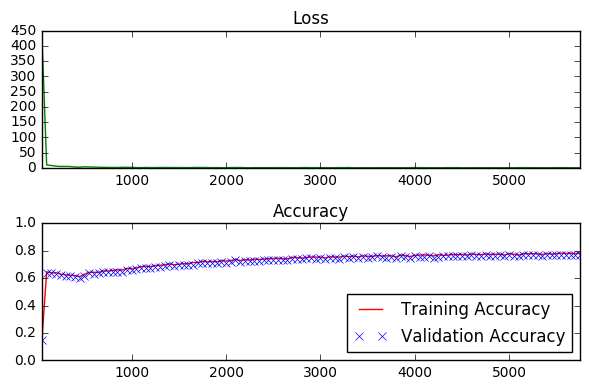

Validation accuracy at 0.768666684627533


In [45]:
import sys
# Session

loss_batch = []
train_acc_batch = []
valid_acc_batch = []
plot_batches = []

# Initializing the variables
init = tf.global_variables_initializer()

save_file = './train_model.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    batch_count = int(math.ceil(n_records/batch_size))
    for epoch in range(training_epochs):
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch+1, training_epochs), unit='batches')
        
        mbatches = batches(batch_size, train_features, train_labels)
        assert len(mbatches) == batch_count
        for batch_i in batches_pbar:
            batch = mbatches[batch_i]
            batch_x, batch_y = batch
            _, l = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
            
            if not batch_i % display_step:
                training_accuracy = sess.run(accuracy, feed_dict={x: train_features, y: train_labels})
                validation_accuracy = sess.run(accuracy, feed_dict={x: valid_features, y: valid_labels})
                
                previous_batch = plot_batches[-1] if plot_batches else 0
                plot_batches.append(display_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
                sys.stdout.write("\rProgress: {:2.1f}".format(100 * batch_i/float(batch_count)) \
                     + "% ... Training loss: " + str(l)[:5] \
                     + " ... Validation accuracy: " + str(validation_accuracy)[:5])
                sys.stdout.flush()
        # Check accuracy against Validation data
        validation_accuracy = sess.run(accuracy, feed_dict={x: valid_features, y: valid_labels})
    saver.save(sess, save_file)
    print("Trained model saved!")

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(plot_batches, loss_batch, 'g')
loss_plot.set_xlim([plot_batches[0], plot_batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(plot_batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(plot_batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([plot_batches[0], plot_batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))


In [44]:
print('Validation accuracy at {}'.format(validation_accuracy))

Validation accuracy at 0.7769333124160767


In [48]:
with tf.Session() as sess:
    saver.restore(sess, save_file)
    test_accuracy = sess.run(
        accuracy,
        feed_dict={x: test_features, y: test_labels})
    
print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./train_model.ckpt
Test Accuracy: 0.8513000011444092
